## Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from src.Client import Client
from src.Server import Server

## Data Preprocessing

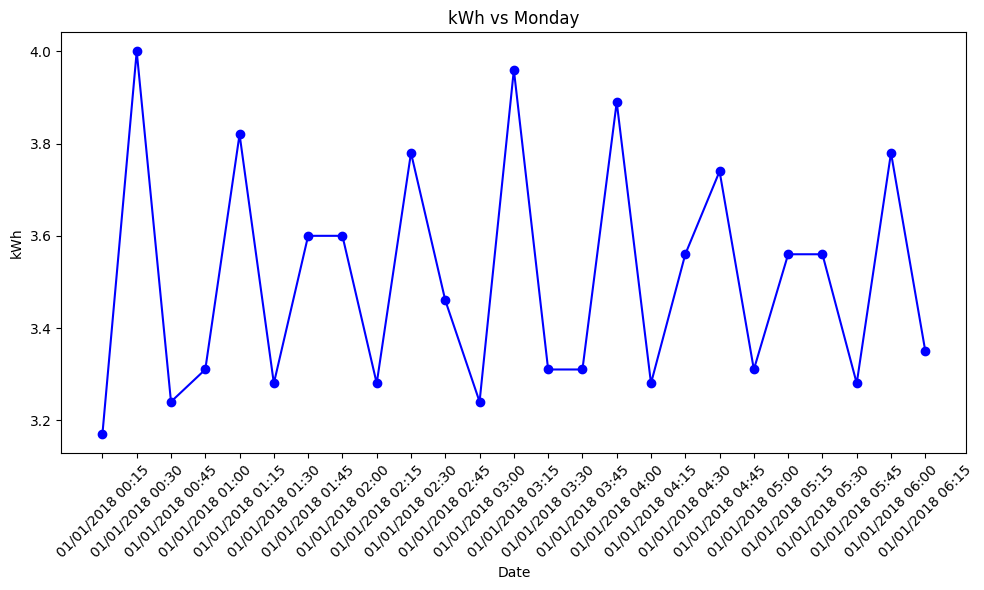

In [2]:
df=data = pd.read_csv("Steel_industry_data.csv")
# df = pd.DataFrame(data)

# Plot kWh vs Day_of_week
df=df[df['Day_of_week'] == 'Monday']
df=df.head(25)
plt.figure(figsize=(10, 6))
# plt.plot(df['Day_of_week'], df['Usage_kWh'], marker='o', linestyle='-', color='b')
plt.plot(df['date'], df['Usage_kWh'], marker='o', linestyle='-', color='b')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('kWh')
plt.title('kWh vs Monday')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

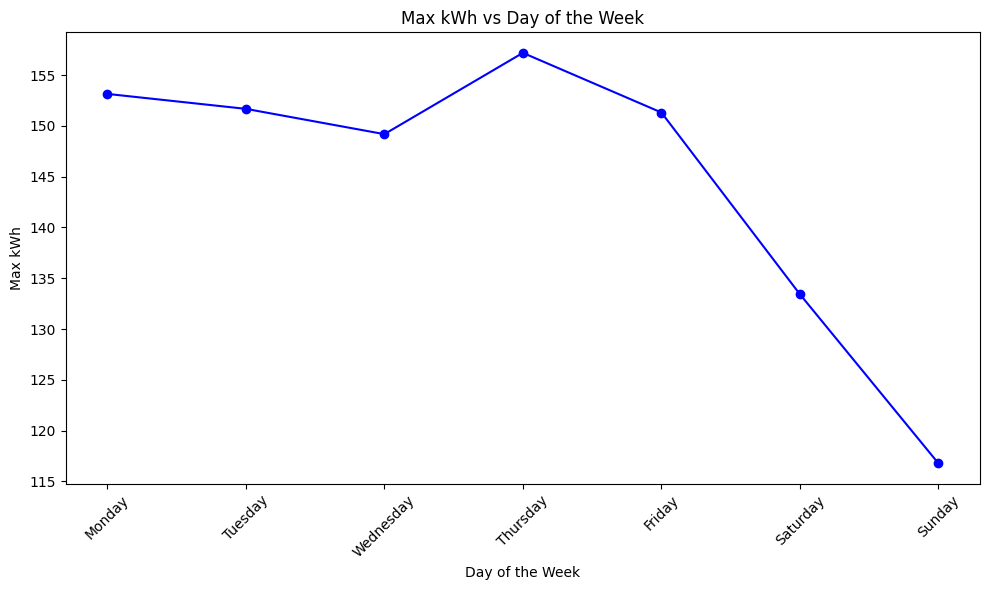

In [3]:
df=data = pd.read_csv("Steel_industry_data.csv")
df_max_kwh = df.groupby('Day_of_week')['Usage_kWh'].max().reset_index()

# Sort by Day_of_week to ensure the days are in the correct order (if needed)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_max_kwh['Day_of_week'] = pd.Categorical(df_max_kwh['Day_of_week'], categories=days_order, ordered=True)
df_max_kwh = df_max_kwh.sort_values('Day_of_week')

# Plot max kWh vs Day_of_week
plt.figure(figsize=(10, 6))
plt.plot(df_max_kwh['Day_of_week'], df_max_kwh['Usage_kWh'], marker='o', linestyle='-', color='b')

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Max kWh')
plt.title('Max kWh vs Day of the Week')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [4]:
data = pd.read_csv("Steel_industry_data.csv")
print(data.isnull().sum())  # Count of missing values in each column
datecol=data.iloc[:,0]
print(datecol)

data = data.drop(columns=['date'])
X_train=data.values
feature_names = data.columns.tolist()

data.head()


date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64
0        01/01/2018 00:15
1        01/01/2018 00:30
2        01/01/2018 00:45
3        01/01/2018 01:00
4        01/01/2018 01:15
               ...       
35035    31/12/2018 23:00
35036    31/12/2018 23:15
35037    31/12/2018 23:30
35038    31/12/2018 23:45
35039    31/12/2018 00:00
Name: date, Length: 35040, dtype: object


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [5]:
print(feature_names)

['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type']


In [6]:
kwh=data.iloc[:,1]
# plt.figure(figsize=(10, 6))
# plt.plot(datecol, kwh, marker='o', color='b', linestyle='-')
# plt.xlabel('Date')
# plt.ylabel('kWh')
# plt.title('Date vs kWh Consumption')
# plt.grid(True)
# plt.xticks(rotation=45)  # Rotate dates for better readability
# plt.tight_layout()       # Adjust layout for better fit
# plt.show()

In [7]:
print(X_train)


[[3.17 2.95 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [4.0 4.46 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [3.24 3.28 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 ...
 [3.78 3.17 0.07 ... 'Weekday' 'Monday' 'Light_Load']
 [3.78 3.06 0.11 ... 'Weekday' 'Monday' 'Light_Load']
 [3.67 3.02 0.07 ... 'Weekday' 'Monday' 'Light_Load']]


In [8]:
X_train.shape

(35040, 10)

Feature Scaling

In [9]:
#Feature Scaling
scaler = StandardScaler()


X_train[:, :7] = scaler.fit_transform(X_train[:, :7]).astype('float64')


print(X_train)
X_train.shape


[[-0.7241048627057641 -0.6185163432975694 -0.5213850478056785 ...
  'Weekday' 'Monday' 'Light_Load']
 [-0.699287184784774 -0.5259110722465691 -0.5213850478056785 ...
  'Weekday' 'Monday' 'Light_Load']
 [-0.7220118055317047 -0.598278105253311 -0.5213850478056785 ...
  'Weekday' 'Monday' 'Light_Load']
 ...
 [-0.705865364474675 -0.6050241846013972 -0.5119566216410291 ...
  'Weekday' 'Monday' 'Light_Load']
 [-0.705865364474675 -0.6117702639494832 -0.5065689495469436 ...
  'Weekday' 'Monday' 'Light_Load']
 [-0.7091544543196255 -0.6142233837124237 -0.5119566216410291 ...
  'Weekday' 'Monday' 'Light_Load']]


(35040, 10)

In [10]:
X_train

array([[-0.7241048627057641, -0.6185163432975694, -0.5213850478056785,
        ..., 'Weekday', 'Monday', 'Light_Load'],
       [-0.699287184784774, -0.5259110722465691, -0.5213850478056785,
        ..., 'Weekday', 'Monday', 'Light_Load'],
       [-0.7220118055317047, -0.598278105253311, -0.5213850478056785,
        ..., 'Weekday', 'Monday', 'Light_Load'],
       ...,
       [-0.705865364474675, -0.6050241846013972, -0.5119566216410291,
        ..., 'Weekday', 'Monday', 'Light_Load'],
       [-0.705865364474675, -0.6117702639494832, -0.5065689495469436,
        ..., 'Weekday', 'Monday', 'Light_Load'],
       [-0.7091544543196255, -0.6142233837124237, -0.5119566216410291,
        ..., 'Weekday', 'Monday', 'Light_Load']], dtype=object)

Column tranforming and label encoding

In [11]:
# Transforming Categorical data into number matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[7,8])],remainder='passthrough')
X_train=ct.fit_transform(X_train)
print(X_train)
print(X_train.shape)



[[1.0 0.0 0.0 ... 0.5132676163619359 -1.6780152604563736 'Light_Load']
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6419289107691397 'Light_Load']
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6058425610819058 'Light_Load']
 ...
 [1.0 0.0 0.0 ... 0.5126109334762843 1.6780152604563736 'Light_Load']
 [1.0 0.0 0.0 ... 0.5119542505906323 1.7141016101436073 'Light_Load']
 [1.0 0.0 0.0 ... 0.5126109334762843 -1.7141016101436073 'Light_Load']]
(35040, 17)


In [12]:
#label encoding on the suitable column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_train[:,-1]=le.fit_transform(X_train[:,-1])
print(X_train)
type(X_train)
df=pd.DataFrame(X_train)
df.to_csv('scaled_Steel_industry_data.csv', index=False, header=True)

[[1.0 0.0 0.0 ... 0.5132676163619359 -1.6780152604563736 0]
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6419289107691397 0]
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6058425610819058 0]
 ...
 [1.0 0.0 0.0 ... 0.5126109334762843 1.6780152604563736 0]
 [1.0 0.0 0.0 ... 0.5119542505906323 1.7141016101436073 0]
 [1.0 0.0 0.0 ... 0.5126109334762843 -1.7141016101436073 0]]


## Federated Learning

In [13]:
#splitting the entire data into 8 nodes to perform FL
node_data = np.array_split(X_train, 8)


In [14]:
train_data = np.concatenate(node_data[:7], axis=0)

# Use the last chunk for testing
test_data = node_data[7]

# Verify the splits
print(f"Training Data Shape: {train_data.shape}")
print(f"Testing Data Shape: {test_data.shape}")

Training Data Shape: (30660, 17)
Testing Data Shape: (4380, 17)


In [15]:
server_node = Server()
server_node.print_dag()

Adjacency Matrix:
[0]

Nodes:
Node 0: {'model': {'coef_': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'intercept_': 0.0}, 'metadata': {'is_global': True}, 'client_id': None}


### Federated Learning Process

#### With OOPS approach

In [16]:
clients = [
    Client(
        client_id=f"Client {i + 1}", 
        local_data=np.concatenate((node[:, :9], node[:, 10:]), axis=1),  # Features (remove 12th column)
        local_labels=node[:, 9]  # Labels (Usage_kWh)
    )  
    for i, node in enumerate(node_data)  # Only using the first 7 chunks for clients
]

In [17]:
for client in clients:
    print(f"Client ID: {client.client_id}")
    print("Local Labels:")
    print(client.local_labels)
    print("-" * 50)


Client ID: Client 1
Local Labels:
[-0.7241048627057641 -0.699287184784774 -0.7220118055317047 ...
 -0.7187227156867542 -0.7208157728608136 -0.7199187483576454]
--------------------------------------------------
Client ID: Client 2
Local Labels:
[-0.7187227156867542 -0.7187227156867542 -0.7112475114936849 ...
 -0.7348691567437838 -0.7348691567437838 -0.7348691567437838]
--------------------------------------------------
Client ID: Client 3
Local Labels:
[-0.7187227156867542 -0.7273939525507146 -0.7369622139178433 ...
 2.26388375734789 2.2716579697086825 0.2455786252191835]
--------------------------------------------------
Client ID: Client 4
Local Labels:
[-0.589551187230517 -0.6971941276107146 -0.6983901602816057 ...
 1.1455932100647255 1.2950972939261112 1.0875856255265075]
--------------------------------------------------
Client ID: Client 5
Local Labels:
[-0.572507721670319 -0.6669943026707147 -0.6520438942845761 ...
 -0.7369622139178433 -0.7360651894146749 -0.7208157728608136]
--

In [18]:

# Train local models for each client
for client in clients:
    # Each client fetches the global model
    global_model = client.get_global_model(server_node)

    # Client trains its local model
    local_update = client.train_local_model(global_model)

    # Client sends its update to the server
    metadata = {"weight": 1, "timestamp":1}  # Add any relevant metadata
    client.send_update_to_server(server_node, metadata)

    # Evaluate the client's local model
    y_pred = client.local_model.predict(client.local_data)
    mse = mean_squared_error(client.local_labels, y_pred)
    print(f"  {client.client_id} - MSE: {mse:.4f}")

    # Server aggregates the updates
    aggregated_model = server_node.aggregate()

    # Update global model after aggregation
    server_node.global_model.coef_ = aggregated_model["coef_"]
    server_node.global_model.intercept_ = aggregated_model["intercept_"]



# Print the final DAG
print("Final DAG after training:")
server_node.print_dag()


  Client 1 - MSE: 0.0491
  Client 2 - MSE: 0.0139
  Client 3 - MSE: 0.0131
  Client 4 - MSE: 0.0113
  Client 5 - MSE: 0.0124
  Client 6 - MSE: 0.0097
  Client 7 - MSE: 0.0124
  Client 8 - MSE: 0.0091
Final DAG after training:
Adjacency Matrix:
[0, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]

Nodes:
Node 0: {'model': {'coef_': array([-8.44623302e+11, -3.08216843e+11,  5.35099239e+11,  5.35099239e+11,
       -1.30722001e+09, -1.30722001e+09,  5.35099239e+11,  5.35099239e+11,
        5.35099239e+11,  1.66387498e-01,  1.25718117e-03,  7.79412806e-01,
        9.32293087e-02,  4.68057394e-02, -1.33258151e-03,  2.91977227e-02]), 'intercept_': np.float64(309524062785.38464)}, 'metadata': {'is_global': True}, 'client_id': None}
Node 1: {'model': {'coef_': array([-6.57721282e+11, -7.57756480e+10

## Final Evaluation of our Global model

In [ ]:

test_data = node_data[0][:4380]  # uncomment this line for 98% accuracy
y_test = test_data[:, 9]   # Target (Usage_kWh)
    # Select all columns except the 12th column using slicing
X_test= np.concatenate((test_data[:, :9], test_data[:, 10:]), axis=1)

df=pd.DataFrame(y_test)
df.to_csv('test_data.csv', index=False, header=True)
y_pred= server_node.global_model.predict(X_test)
# y_pred = global_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
print(f"Final Global Model MSE on Test Data: {final_mse:.4f}")

Final Global Model MSE on Test Data: 0.0668


comparing the predicted results vs the actual results

In [20]:
output=np.concatenate((y_pred.reshape(-1,1),y_test.reshape(-1,1)),1)

df=pd.DataFrame(output)
df.to_csv("output.csv", index=False, header=True)

## R2 Score with FL

In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2) #With FL

0.9543397082074563


## Visualizing the Results (FL)

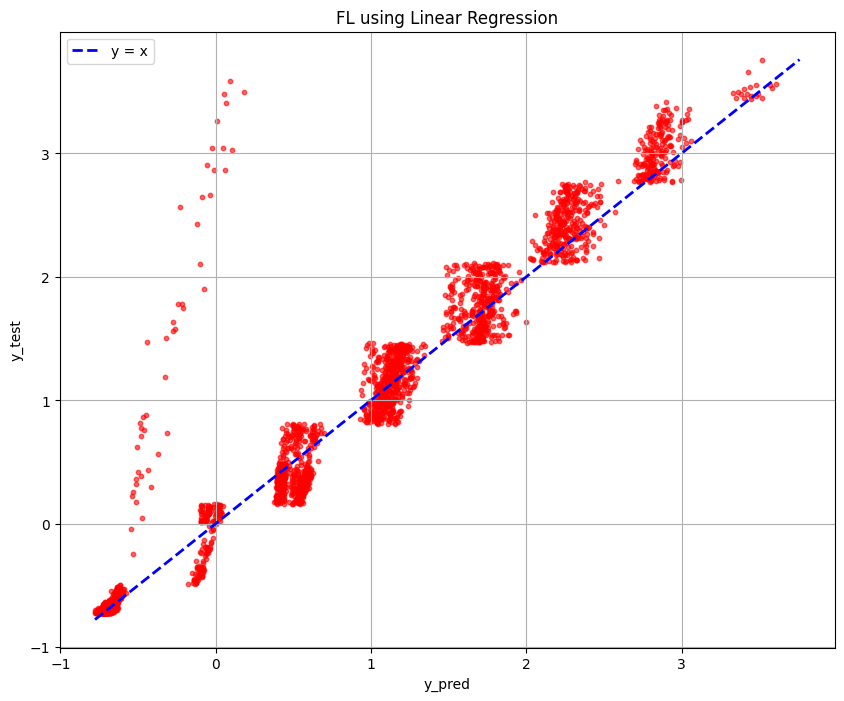

In [22]:


# Increase figure size for better readability
plt.figure(figsize=(10, 8))

# Scatter plot with smaller markers and added transparency
plt.scatter(y_pred, y_test, color='red', s=10, alpha=0.6)

# Plot y=x line with increased thickness for clarity
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', linewidth=2, label='y = x')

# Adding title and labels
plt.title("FL using Linear Regression")
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid for easier reading

# Show the plot
plt.show()


## Comparision of Global model if done Without FL

In [23]:
regressor=LinearRegression()
without_FL=X_train

X_withoutFL= np.concatenate((without_FL[:, :9], without_FL[:, 10:]), axis=1)
y_withoutFL = without_FL[:, 9]   # Target (Usage_kWh)


In [24]:
from sklearn.model_selection import train_test_split

X_withoutFL_train, X_withoutFL_test,y_withoutFL_train,y_withoutFL_test = train_test_split(X_withoutFL,y_withoutFL,test_size=0.25,random_state=0)

In [25]:
X_withoutFL_test.shape

(8760, 16)

In [26]:
X_withoutFL_train.shape

(26280, 16)

In [27]:
y_withoutFL_test.shape

(8760,)

In [28]:
y_withoutFL_train.shape

(26280,)

In [29]:
regressor.fit(X_withoutFL_train,y_withoutFL_train)

LinearRegression()

In [30]:
pred=regressor.predict(X_test)

print(pred)

[-0.69573975 -0.70413208 -0.70281982 ... -0.73709106 -0.737854
 -0.73754883]


In [31]:
y_test

array([-0.7241048627057641, -0.699287184784774, -0.7220118055317047, ...,
       -0.7187227156867542, -0.7208157728608136, -0.7199187483576454],
      dtype=object)

## Visualising the results (Without FL)

In [32]:
# plt.scatter(pred,y_test,color='red')

# plt.title("Training the same dataset without FL (regular LR)")
# plt.xlabel('predicted')
# plt.ylabel('actual')
# plt.show()

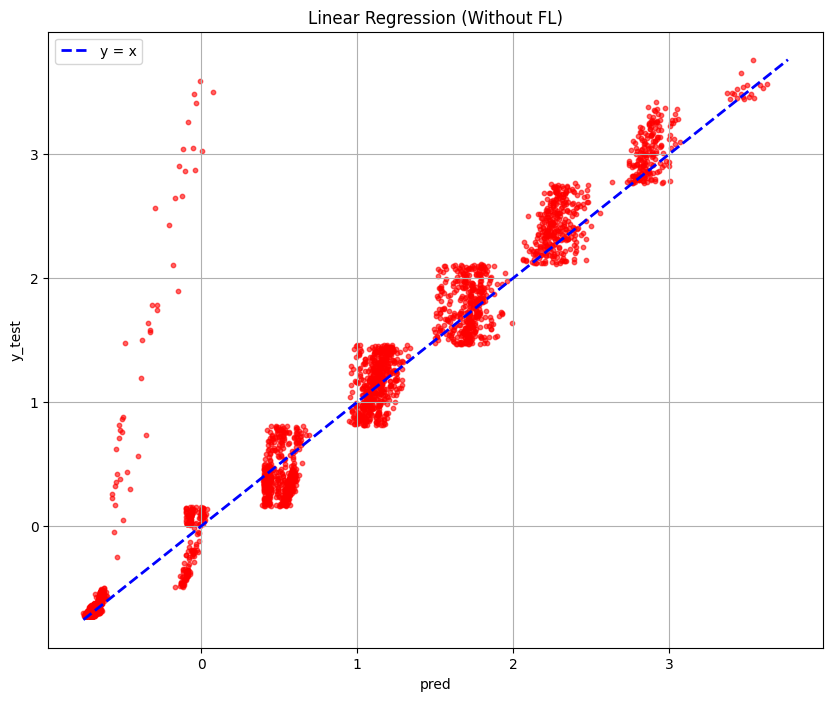

In [33]:
import matplotlib.pyplot as plt

# Increase figure size for better readability
plt.figure(figsize=(10, 8))

# Scatter plot with smaller markers and added transparency
plt.scatter(pred, y_test, color='red', s=10, alpha=0.6)

# Plot y=x line with increased thickness for clarity
min_val = min(min(pred), min(y_test))
max_val = max(max(pred), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', linewidth=2, label='y = x')

# Adding title and labels
plt.title("Linear Regression (Without FL)")
plt.xlabel('pred')
plt.ylabel('y_test')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid for easier reading

# Show the plot
plt.show()


In [34]:

# # Scatter plot of predictions vs actual values
# plt.scatter(pred, y_test, color='red')

# # Plot y=x line
# min_val = min(min(pred), min(y_test))
# max_val = max(max(pred), max(y_test))
# plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='y = x')

# # Adding title and labels
# plt.title("Training the same dataset without FL (regular LR)")
# plt.xlabel('predicted')
# plt.ylabel('actual')
# plt.legend()  # Show the legend
# plt.show()


In [35]:
pred.shape

(4380,)

In [36]:
y_test

array([-0.7241048627057641, -0.699287184784774, -0.7220118055317047, ...,
       -0.7187227156867542, -0.7208157728608136, -0.7199187483576454],
      dtype=object)

In [37]:
pred

array([-0.69573975, -0.70413208, -0.70281982, ..., -0.73709106,
       -0.737854  , -0.73754883])

## R2 score without FL

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)
print(r2) #Without FL

0.9526003540633035
